In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
data = pd.read_csv('../data/news/news_part1.csv')
data

,Ticker,Title,URL,Time Published,Authors,Summary,Relevance Score,Ticker Sentiment Score,Ticker Sentiment Label,Technology,...,Retail & Wholesale,Economy - Monetary,Energy & Transportation,Life Sciences,Blockchain,IPO,Earnings,Mergers & Acquisitions,Manufacturing,Finance
0,META,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.424632,Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,AAPL,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.094962,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,HUM,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
3,AAPL,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
4,BAC,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.076358,0.045194,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79492,CRWD,2 Cybersecurity Stocks You Can Buy and Hold fo...,https://www.fool.com/investing/2023/08/27/2-cy...,2023-08-27 10:30:00,['Jeff Santoro'],These two companies have bright futures despit...,0.307731,0.219216,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.999975,0.00000,0.000000,0.000000
79493,PATH,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.472821,0.306128,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79494,CRWD,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.425925,0.135673,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79495,DE,Weekly Roundup,https://aap.thestreet.com/story/16131864/1/wee...,2023-08-25 22:01:00,[],Stocks staged a late comeback this week after ...,0.020001,0.109825,Neutral,0.166667,...,0.166667,0.999682,0.166667,0.166667,0.0,0.310843,1.000000,0.77141,0.166667,0.166667


In [62]:
# check duplicate rows in dataset
data_duplicate=data.drop_duplicates()
data_duplicate.count()

Ticker                        68175
Title                         68175
URL                           68175
Time Published                68175
Authors                       68175
Summary                       68175
Relevance Score               68175
Ticker Sentiment Score        68175
Ticker Sentiment Label        68175
Technology                    68175
Financial Markets             68175
Economy - Fiscal              68175
Economy - Macro               68175
Real Estate & Construction    68175
Retail & Wholesale            68175
Economy - Monetary            68175
Energy & Transportation       68175
Life Sciences                 68175
Blockchain                    68175
IPO                           68175
Earnings                      68175
Mergers & Acquisitions        68175
Manufacturing                 68175
Finance                       68175
dtype: int64

## Preprocessing Steps

In [63]:
# Combining 'Title' and 'Summary' into a single text feature
data['Combined_Text'] = data['Title'] + " " + data['Summary']

In [64]:
# Label Encoding for 'Ticker Sentiment Label'
label_encoder = LabelEncoder()
data['Ticker Sentiment Label Encoded'] = label_encoder.fit_transform(data['Ticker Sentiment Label'])

In [65]:
# Example function to preprocess text data
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Applying the preprocessing function to the combined text column
data['Processed_Text'] = data['Combined_Text'].apply(preprocess_text)


### Tokenization

In [79]:
max_features = 10000  
maxlen = 1000 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
datatok = pad_sequences(sequences, maxlen=maxlen) 

### Preparing Labels

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Ensure 'data' is your original DataFrame
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['Ticker Sentiment Label'])
labels = to_categorical(integer_encoded)

### Splitting the Dataset into Training and Testing Sets

In [80]:
from sklearn.model_selection import train_test_split

# Assuming 'datatok' is your tokenized and padded text data
X_train, X_test, y_train, y_test = train_test_split(datatok, labels, test_size=0.2, random_state=42)

In [81]:
# Display information about datatok
print("Shape of datatok:", datatok.shape)
print("First few entries in datatok:\n", datatok[:5])
print("Data type of datatok:", datatok.dtype)



Shape of datatok: (79497, 1000)
First few entries in datatok:
 [[   0    0    0 ...  162  846  297]
 [   0    0    0 ...  162  846  297]
 [   0    0    0 ... 3028 2824 1962]
 [   0    0    0 ... 3028 2824 1962]
 [   0    0    0 ... 3028 2824 1962]]
Data type of datatok: int32


In [82]:
# Display information about labels
print("Shape of labels:", labels.shape)
print("First few labels:\n", labels[:5])
print("Data type of labels:", labels.dtype)

Shape of labels: (79497, 5)
First few labels:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
Data type of labels: float32


In [83]:
num_features = X_train.shape[1]
print("Number of features in the training set:", num_features)

Number of features in the training set: 1000


In [84]:
num_features = X_test.shape[1]
print("Number of features in the training set:", num_features)

Number of features in the training set: 1000


## Approach One

### Building the Deep Learning Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model parameters
embedding_dim = 128
lstm_units = 50
num_classes = labels.shape[1]  # Number of sentiment classes

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))  # softmax for multi-class classification

### Compiling the Model

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 50)                35800     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 1316055 (5.02 MB)
Trainable params: 1316055 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [48]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10


1789/1789 [==============================] - 403s 223ms/step - loss: 0.7913 - accuracy: 0.6946 - val_loss: 0.7325 - val_accuracy: 0.7036
Epoch 2/10
1789/1789 [==============================] - 405s 227ms/step - loss: 0.6645 - accuracy: 0.7287 - val_loss: 0.7333 - val_accuracy: 0.7145
Epoch 3/10
1789/1789 [==============================] - 419s 234ms/step - loss: 0.6116 - accuracy: 0.7459 - val_loss: 0.7292 - val_accuracy: 0.7134
Epoch 4/10
1789/1789 [==============================] - 409s 228ms/step - loss: 0.5769 - accuracy: 0.7567 - val_loss: 0.7509 - val_accuracy: 0.7151
Epoch 5/10
1789/1789 [==============================] - 397s 222ms/step - loss: 0.5539 - accuracy: 0.7640 - val_loss: 0.7575 - val_accuracy: 0.7167
Epoch 6/10
1789/1789 [==============================] - 376s 210ms/step - loss: 0.5361 - accuracy: 0.7689 - val_loss: 0.7704 - val_accuracy: 0.7142
Epoch 7/10
1789/1789 [==============================] - 368s 206ms/step - loss: 0.5211 - accuracy: 0.7726 - va

### Evaluating the Model

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

497/497 [==============================] - 12s 24ms/step - loss: 0.8367 - accuracy: 0.7227
Test accuracy: 72.27%


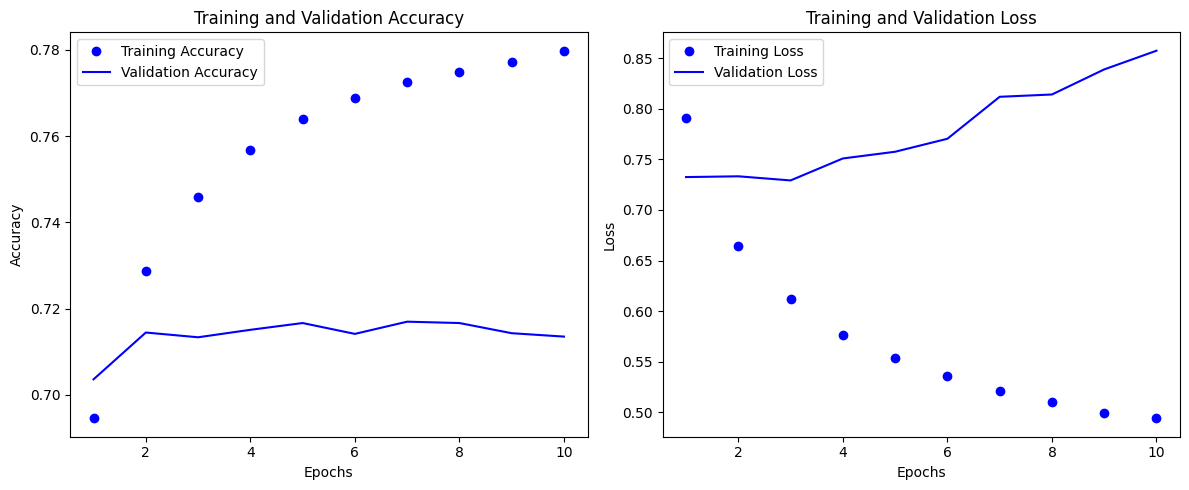

In [55]:
import matplotlib.pyplot as plt

# Extracting the history of training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Approach Two

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Adjusting the model parameters
embedding_dim = 128
lstm_units = 30  # Reduced number of units
num_classes = labels.shape[1]

In [70]:
# Building the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))  # Added Dropout layer
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))  # Added L2 regularization

In [71]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [72]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [73]:
# Train the model with early stopping
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
1789/1789 [==============================] - 373s 206ms/step - loss: 0.8799 - accuracy: 0.6823 - val_loss: 0.7814 - val_accuracy: 0.7019
Epoch 2/10
1789/1789 [==============================] - 407s 228ms/step - loss: 0.7466 - accuracy: 0.7122 - val_loss: 0.7572 - val_accuracy: 0.7066
Epoch 3/10
1789/1789 [==============================] - 371s 207ms/step - loss: 0.6953 - accuracy: 0.7328 - val_loss: 0.7438 - val_accuracy: 0.7129
Epoch 4/10
1789/1789 [==============================] - 380s 213ms/step - loss: 0.6655 - accuracy: 0.7409 - val_loss: 0.7455 - val_accuracy: 0.7131
Epoch 5/10
1789/1789 [==============================] - 363s 203ms/step - loss: 0.6439 - accuracy: 0.7503 - val_loss: 0.7509 - val_accuracy: 0.7132
Epoch 6/10
1789/1789 [==============================] - 429s 240ms/step - loss: 0.6265 - accuracy: 0.7567 - val_loss: 0.7620 - val_accuracy: 0.7116


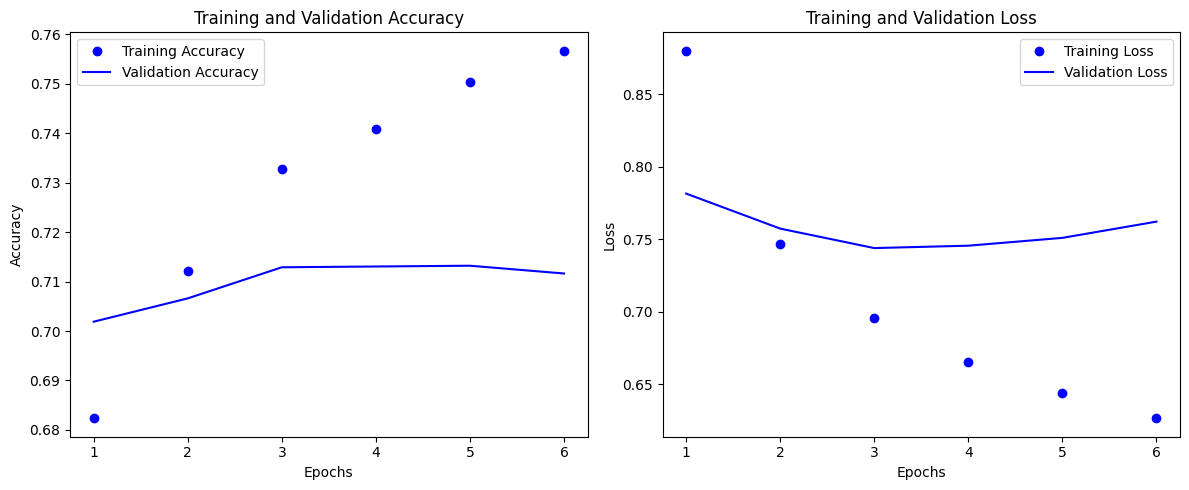

In [74]:
import matplotlib.pyplot as plt

# Extracting the history of training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

497/497 [==============================] - 10s 20ms/step - loss: 0.7343 - accuracy: 0.7195
Test accuracy: 71.95%
